In [1]:
from jeroHelper.setupUtils import append_deepfinder_path, get_tomo_indices, PARENT_PATH
append_deepfinder_path()

from jeroHelper.trainHelper import make_trainer
from jeroHelper.coordGen import OLMaker
from jeroHelper.showcaseResults import (predict_fullTomogram, load_model, load_tomoData, Tversky_index,
                                        fullTomogram_modelComparison, make_comparison_plot, write_comparison_gif, save_classPred)


from deepfinder.utils.common import read_array

import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from textwrap import wrap



%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
train_tomos = ['tomo02', 'tomo03', 'tomo04', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38']

objectList_maker = OLMaker(train_tomos, val_tomos, test_tomos, 500, 300, 0, None, None)

Pairs of tomo IDs to indices:
[('tomo02_patch000', 0), ('tomo02_patch001', 1), ('tomo02_patch002', 2), ('tomo02_patch003', 3), ('tomo02_patch004', 4), ('tomo02_patch005', 5), ('tomo02_patch006', 6), ('tomo02_patch020', 7), ('tomo02_patch021', 8), ('tomo02_patch030', 9), ('tomo03_patch000', 10), ('tomo03_patch002', 11), ('tomo03_patch004', 12), ('tomo03_patch006', 13), ('tomo03_patch008', 14), ('tomo03_patch010', 15), ('tomo03_patch020', 16), ('tomo03_patch021', 17), ('tomo03_patch022', 18), ('tomo03_patch030', 19), ('tomo03_patch031', 20), ('tomo03_patch032', 21), ('tomo04_patch000', 22), ('tomo04_patch002', 23), ('tomo04_patch004', 24), ('tomo04_patch006', 25), ('tomo04_patch008', 26), ('tomo04_patch009', 27), ('tomo04_patch020', 28), ('tomo04_patch021', 29), ('tomo04_patch030', 30), ('tomo10_patch001', 31), ('tomo10_patch002', 32), ('tomo10_patch003', 33), ('tomo10_patch009', 34), ('tomo10_patch010', 35), ('tomo10_patch011', 36), ('tomo10_patch020', 37), ('tomo10_patch030', 38), ('to

In [3]:
tomo_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/tomo38_bin4_denoised_0000.nii.gz'
label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/tomo38_merged_thr02.nii.gz'

tomogram_data, classes = load_tomoData(tomo_file, label_file, is_model_data=False)

z, y, x = tomogram_data.shape

Tomogram shape:  (464, 928, 928)


In [4]:
pred_files = ['data/processed1/deepFinder/predictions/2.09_baselineModel_ep600_in56_lr0.000100_v2/class1Pred_tomo38_bin4_denoised.mrc',
              'data/processed1/deepFinder/predictions/2.09_lowBaselineModel_ep600_in56_lr0.000100_v1/class1Pred_tomo38_bin4_denoised.mrc',
              'data/processed1/deepFinder/predictions/2.10_preTrainedReconstructionTaskModel_ep700_in56_lr0.000100_v0/class1Pred_tomo38_bin4_denoised.mrc',
              'data/processed1/deepFinder/predictions/2.10_preTrainedReconstructionTaskModel_ep700_in56_lr0.000100_v3/class1Pred_tomo38_bin4_denoised.mrc']
pred_files = [PARENT_PATH+f for f in pred_files]


class_predDict = {}
for f in pred_files:
    model = f.split('/')[-2]
    class_predDict[model] = read_array(f)

In [5]:
pred_keys = list(class_predDict.keys())
n_models = len(pred_keys)
n_cols = n_models + 2

In [6]:
def f(z):
    fig, axs = plt.subplots(1, n_cols, figsize=(25, 15))

    plt.figure()     
    for i in range(n_cols):
        ax = axs[i]
        if i < n_models:
            name = pred_keys[i]
            ax.imshow(class_predDict[name][z])
            ax.set_title("\n".join(wrap(name.replace('_', ' '), 20)))
        elif i==n_models:
            name = 'Labels'
            ax.imshow(classes[z])
            ax.set_title(name)

        elif i==n_models+1:
            name = 'Observed z = %i' %z 
            ax.imshow(tomogram_data[z])
            ax.set_title(name)

    plt.show()
    return

In [7]:
interact(f, z=widgets.IntSlider(min=0, max=464, step=10, value=0));

interactive(children=(IntSlider(value=0, description='z', max=464, step=10), Output()), _dom_classes=('widget-…

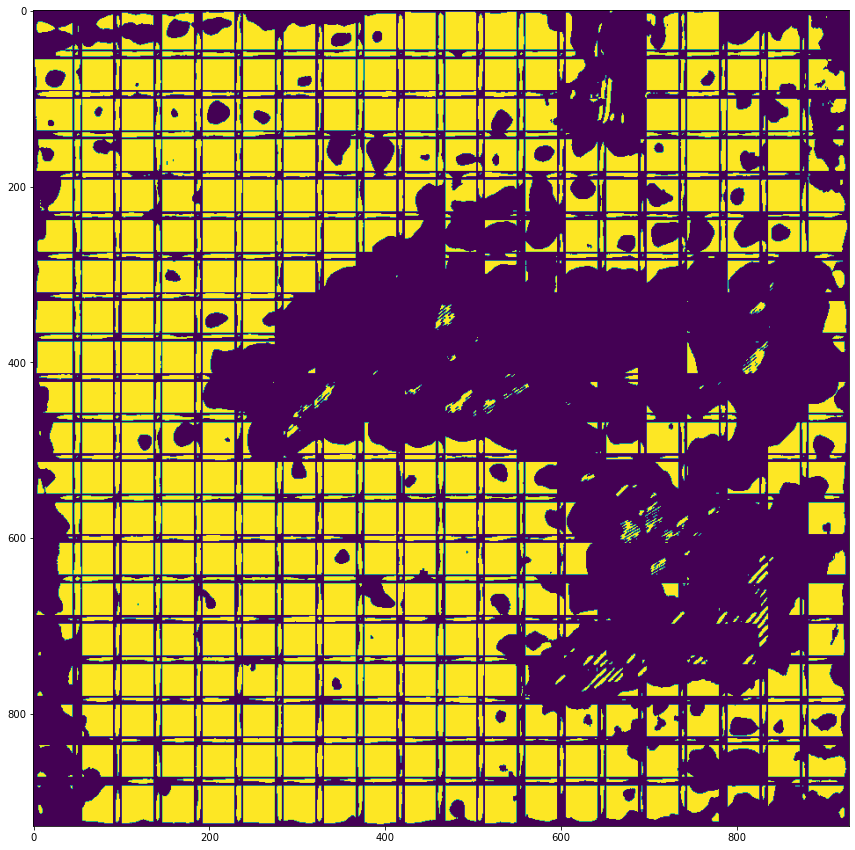

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(class_predDict['2.10_preTrainedReconstructionTaskModel_ep700_in56_lr0.000100_v0'][370], cmap='viridis')